In [2]:
import joblib
data = joblib.load("cache.out/feb_19_01_07_2.pick.lz4")
len(data)

112

['id', 'start', 'end', 'ground_station', 'transmitter', 'norad_cat_id', 'payload', 'waterfall', 'demoddata', 'station_name', 'station_lat', 'station_lng', 'station_alt', 'vetted_status', 'archived', 'archive_url', 'client_version', 'client_metadata', 'vetted_user', 'vetted_datetime', 'rise_azimuth', 'set_azimuth', 'max_altitude', 'transmitter_uuid', 'transmitter_description', 'transmitter_type', 'transmitter_uplink_low', 'transmitter_uplink_high', 'transmitter_uplink_drift', 'transmitter_downlink_low', 'transmitter_downlink_high', 'transmitter_downlink_drift', 'transmitter_mode', 'transmitter_invert', 'transmitter_baud', 'transmitter_updated', 'tle', 'start_unix', 'end_unix', 'satellite_info', 'transmitter_info', 'file', 'analyzed', 'measured_snrs', 'linedata', 'has_sync', 'correlation_values']
['norad_cat_id', 'name', 'names', 'image', 'status', 'decayed']
443368
['1 25338U 98030A   19030.96950122  .00000022  00000-0  27950-4 0  9999', '2 25338  98.7579  52.4062 0009491 287.6104  72.4

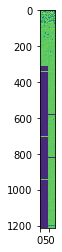

In [3]:
import numpy as np
import matplotlib.pyplot as plt

obs_id = 4
print(list(data[obs_id].keys()))
print(list(data[obs_id]["satellite_info"].keys()))
print(data[obs_id]["id"])
print(data[obs_id]["tle"])
img_part = data[obs_id]["linedata"]
doi = [np.concatenate((line[44:86], line[134:176])) for line in img_part]
plt.imshow(doi)

gs = {
    contact_dict["station_name"]: {
        "id": contact_dict["station_name"],
        "lat": contact_dict["station_lat"],
        "lon": contact_dict["station_lng"],
        "alt": contact_dict["station_alt"],
    }
    for contact_dict in data
}
sat = {
    contact_dict["satellite_info"]["name"]: []
    for contact_dict in data
}
for contact_dict in data:
    sat[contact_dict["satellite_info"]["name"]].append(
        (
            contact_dict["start_unix"],
            contact_dict["tle"],
        )
    )
scenario = {
        "gslist": [val for _, val in gs.items()],
        "satlist": [
            {
                "id": key,
                "tle": None,
                "tle_list": "<{} elements>".format(len(val)),#list(sorted(val, key=lambda x: x[0])),
            }
            for key, val in sat.items()
        ],
        "time_offset": int(
            min(contact_dict["start_unix"] for contact_dict in data) - 1
        ),
}
print(scenario)

array([-1.70693353e-01, -1.46647628e-02, -1.04991779e-02, -8.08565727e-03,
       -6.70042941e-03, -5.72081415e-03, -5.04237778e-03, -4.51887914e-03,
       -4.05028135e-03, -3.64271960e-03, -3.28198189e-03, -2.93665068e-03,
       -2.63456954e-03, -2.35702500e-03, -2.06654628e-03, -1.79050951e-03,
       -1.52177006e-03, -1.26395757e-03, -9.86603124e-04, -7.28614037e-04,
       -4.80968540e-04, -2.15441145e-04,  3.33466764e-05,  2.90192415e-04,
        5.75027321e-04,  8.60952830e-04,  1.17397122e-03,  1.49063596e-03,
        1.83822465e-03,  2.18913021e-03,  2.59662447e-03,  3.08657067e-03,
        3.62881889e-03,  4.27607820e-03,  5.07387804e-03,  6.14403514e-03,
        7.91878492e-03,  1.14771465e-02,  2.27789597e-02,  5.57484948e-01,
        8.40484393e-01,  9.26659748e-01,  9.42226046e-01,  9.50630015e-01,
        9.56213036e-01,  9.60284969e-01,  9.63570937e-01,  9.66259179e-01,
        9.68565896e-01,  9.70588369e-01,  9.72396374e-01,  9.73939643e-01,
        9.75351431e-01,  

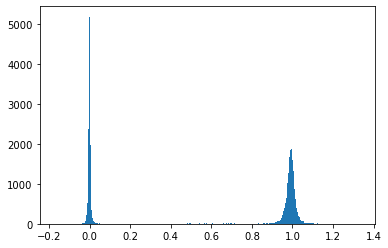

In [5]:
xdata = [x for i, line in enumerate(doi) for x in line if data[obs_id]["has_sync"][i]]
plt.hist(xdata, 1000)
np.percentile(xdata, np.arange(0,100,1))

In [6]:
import scipy.optimize

def get_gaussian_bimodal_means(samples, bins=100):
    y, x = np.histogram(samples, bins=bins)

    x = (x[1:] + x[:-1]) / 2 # for len(x)==len(y)

    def gauss(x, mu, sigma, A):
        return A * np.exp(-(x - mu) * (x - mu) / (2 * sigma * sigma))

    def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
        return gauss(x, mu1, sigma1, A1) + gauss(x, mu2, sigma2, A2)

    expected = (10, .2, 5000, 75, .2, 3000)
    params, cov = scipy.optimize.curve_fit(bimodal, x, y, expected)

    return params[0], params[3]

print(len(xdata))
print(get_gaussian_bimodal_means(xdata))

89208
(10.0, 75.0)


/usr/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


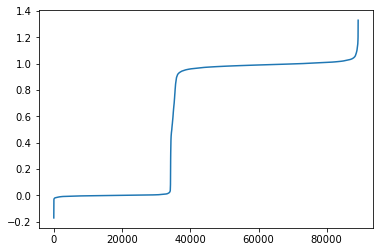

In [7]:
plt.plot(sorted(xdata))

0.0029297503642737865
[ 58 241 396] {'prominences': array([3.07170694, 0.00541658, 4.38719198]), 'left_bases': array([  0, 131, 131]), 'right_bases': array([131, 313, 511])} [2, 0, 1] []
0.9909526 0.00069703837
[319] {'prominences': array([0.00542934]), 'left_bases': array([0]), 'right_bases': array([585])} [0] []
[319] {'prominences': array([0.00542934]), 'left_bases': array([0]), 'right_bases': array([585])} [0] []
0.9912128606052552 0.0009572880049794996


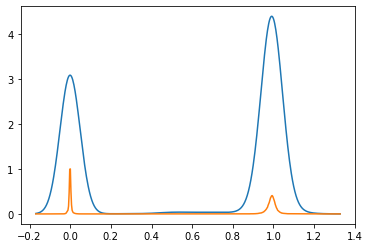

In [8]:
import scipy.stats
import scipy.signal

kernel = scipy.stats.gaussian_kde(xdata)

bin_count = 512
bin_granularity = (max(xdata) - min(xdata)) / bin_count
refinement_granularity = 1e-5

print(bin_granularity)

y, x = np.histogram(xdata, bins=512)
x = (x[1:] + x[:-1]) / 2
v = kernel(x)
plt.plot(x, v)
plt.plot(x, y / max(y))
peaks, properties = scipy.signal.find_peaks(v, prominence=0.00001)
best_peaks = sorted(range(len(peaks)), key=lambda i: properties["prominences"][i], reverse=True)

print(peaks, properties, best_peaks, [])
print(x[peaks[best_peaks[0]]], x[peaks[best_peaks[1]]])
                                                   
pk1 = x[peaks[best_peaks[0]]]
pk2 = x[peaks[best_peaks[1]]]
pk1range = np.arange(pk1 - bin_granularity, pk1 + bin_granularity, refinement_granularity)
pk2range = np.arange(pk2 - bin_granularity, pk2 + bin_granularity, refinement_granularity)

peaks1, properties = scipy.signal.find_peaks(kernel(pk1range), prominence=0.00001)
best_peaks1 = sorted(range(len(peaks1)), key=lambda i: properties["prominences"][i], reverse=True)
print(peaks1, properties, best_peaks1, [])

peaks2, properties = scipy.signal.find_peaks(kernel(pk1range), prominence=0.00001)
best_peaks2 = sorted(range(len(peaks2)), key=lambda i: properties["prominences"][i], reverse=True)
print(peaks2, properties, best_peaks2, [])

print(pk1range[peaks1[best_peaks1[0]]], pk2range[peaks2[best_peaks2[0]]])

In [9]:
def identify_best_peaks(samples, kernel, xvalues, npeaks, prominence=1e-5):
    v = kernel(xvalues)
    peaks, properties = scipy.signal.find_peaks(v, prominence=1.e-5)
    best_peaks_indices = sorted(
        range(len(peaks)),
        key=lambda i: properties["prominences"][i],
        reverse=True,
    )
    return [xvalues[peaks[best_peaks_indices[i]]] for i in range(npeaks)]


def get_gaussian_bimodal_means(samples, bins=512, step2_granularity=5.e-5):
    base_min = min(samples)
    base_max = max(samples)
    base_granularity = (base_max - base_min) / bin_count
    base_range = np.arange(base_min, base_max, base_granularity)
    kernel = scipy.stats.gaussian_kde(samples)

    try:
        peaks = identify_best_peaks(samples, kernel, x, 2)
    except IndexError:
        return None, None

    peak1 = min(peaks)
    peak2 = max(peaks)

    p1range = np.arange(
        peak1 - base_granularity,
        peak1 + base_granularity,
        step2_granularity,
    )
    p2range = np.arange(
        peak2 - base_granularity,
        peak2 + base_granularity,
        step2_granularity,
    )

    try:
        peak1 = identify_best_peaks(samples, kernel, p1range, 1)[0]
        peak2 = identify_best_peaks(samples, kernel, p2range, 1)[0]
    except IndexError:
        return None, None

    return peak1, peak2

get_gaussian_bimodal_means(xdata)

(-0.0006327119950205046, 0.9912228606052693)

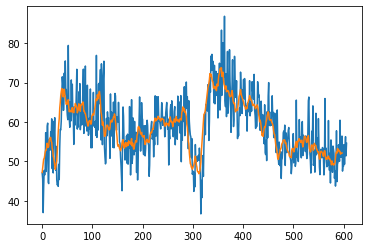

In [10]:
# https://stackoverflow.com/a/14314054
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(data[obs_id]["measured_snrs"])
plt.plot(moving_average(data[obs_id]["measured_snrs"], 10))

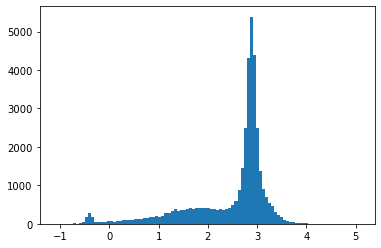

In [7]:
import scipy.special
import scipy.integrate

# we want the BER, signal is ASK demoded from FM
# data rate is 2 lines per second with len(line)=2080 px -> 4160 baud
# we know the value which is transmitted in the "space" area which we extracted
# we associate this to one symbol and derive the BER for a hard decision
# (in the specified time frame of the contact)

# gauss-kernel based estimator for PDF and derival of the BER follows
# TODO: filter out minute markers; support for IR (black) image

r = [line[134:176] for line in data[obs_id]["linedata"]]

twopi_root_inv = 1/np.sqrt(2*np.pi)

expected_zero = 0
expected_one = 1

val = [x for line in r for x in line]
filtered_lines = [line for i, line in enumerate(r) if data[obs_id]["has_sync"][i]]
val_filtered = [x for line in filtered_lines for x in line]

in_data = [(x - expected_zero) / (expected_one - expected_zero) * 2 - 1 for x in val_filtered]
plt.hist(in_data, 100)
None

dtype('float32')

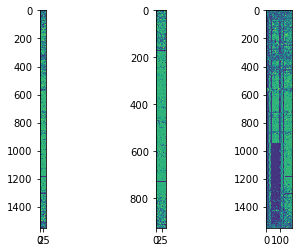

In [8]:
plt.subplot(1,3,1)
plt.imshow(r)
plt.subplot(1,3,2)
plt.imshow(filtered_lines)
plt.subplot(1,3,3)
plt.imshow(data[obs_id]["linedata"])
data[obs_id]["linedata"].dtype

0.05952832938198352
(0.9993559158978736, 0.08466815486349466)
0.0998076786690457


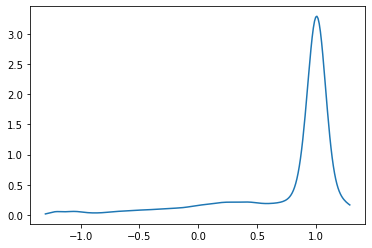

In [8]:
h_n = (3/(4*len(in_data)))**(1/5)*np.std(in_data)
print(h_n)
# h_n = 0.001

fac = 1/(len(in_data)*h_n)
pdf = lambda x: fac * sum(twopi_root_inv * np.exp(-.5 * ((x - v)/h_n)*((x - v)/h_n)) for v in in_data)

xv = np.arange(-1.3,1.3,1e-2)
plt.plot(xv, pdf(xv))

# verify pdf is a pdf
print(scipy.integrate.quad(pdf, -2, 2, epsabs=0.2))

q = lambda value: .5 * scipy.special.erfc(value/np.sqrt(2))

# we have only one possible value and thus need to assume the BER is symmetric...
p_err = 1/len(in_data) * sum(q(x/h_n) for x in in_data)
print(p_err)

In [9]:
data_by_station = {}
data_by_satellite = {}

for entry in data:
    station = entry["station_name"]
    satellite = entry["satellite_info"]["name"]
    if station not in data_by_station:
        data_by_station[station] = {}
    if satellite not in data_by_station[station]:
        data_by_station[station][satellite] = []
    if satellite not in data_by_satellite:
        data_by_satellite[satellite] = {}
    if station not in data_by_satellite[satellite]:
        data_by_satellite[satellite][station] = []
    data_by_station[station][satellite].append(entry)
    data_by_satellite[satellite][station].append(entry)
    data_by_station[station][satellite].sort(key=lambda e: e["start_unix"])
    data_by_satellite[satellite][station].sort(key=lambda e: e["start_unix"])

data_len_info = {sat_name: {gs_name: len(gs_contacts) for gs_name, gs_contacts in gs_dict.items()} for sat_name, gs_dict in data_by_satellite.items()}
import json
print(json.dumps(data_len_info, indent=4))

{
    "NOAA 15": {
        "KB9JHU": 9,
        "Saclay1": 27
    },
    "NOAA 18": {
        "KB9JHU": 9,
        "Saclay1": 19
    },
    "NOAA 19": {
        "KB9JHU": 19,
        "Saclay1": 29
    }
}


In [53]:
import datetime
import scipy.special

TIME_RESOLUTION = 1
APT_RESOLUTION = 0.5  # 2 lines every second


def _preprocess_contact_dict(contact_dict, soft_start, soft_end):
    timestamps = np.arange(soft_start, soft_end, APT_RESOLUTION)
    dates = [
        datetime.datetime.utcfromtimestamp(ts)
        for ts in timestamps
    ]

    img_part = contact_dict["linedata"]
    has_sync = contact_dict["has_sync"]

    assert abs(
        len(img_part) * APT_RESOLUTION -
        len(contact_dict["measured_snrs"])
    ) < 10  # 10 seconds
    assert len(img_part) < len(dates)
    assert abs(len(img_part) - len(dates)) < 60  # 30 seconds
    assert len(img_part) == len(has_sync)

    # strip dates to measured duration
    dates = dates[:len(img_part)]
    timestamps = timestamps[:len(img_part)]

    return img_part, has_sync, dates, timestamps

def combine_lines(image, nlines, max_nan=0):
    new_image = []
    for i in range(len(image) // nlines):
        new_line = []
        err = False
        nan_lines = 0
        for line in image[i * nlines:(i + 1) * nlines]:
            if np.isnan(line[0]):
                nan_lines += 1
                if nan_lines > max_nan:
                    err = True
                else:
                    new_line += [float("nan")] * len(line)
            else:
                new_line += list(line)
        if err:
            new_image.append(np.array([float("nan")] * nlines * len(line)))
        else:
            new_image.append(np.array(new_line))
    return np.array(new_image, ndmin=2, dtype=float)

def _get_doi(line_data):
    doi = []
    for i, line in enumerate(line_data):
        first = line[44:86]
        second = line[134:176]
        # check if line is inverted (in case we encountered an ir image or
        # the minute marker...)
        if np.median(first) < .5:
            first = 1 - first
        if np.median(second) < .5:
            second = 1 - second
        # add combined line to doi
        doi.append(np.concatenate((first, second)))
        assert len(doi[-1] == 84)
    return np.array(doi, ndmin=2, dtype=float)


def _estimate_apt_space_pixel_ber(pixels):

    # estimation kernel == gauss kernel
    def q(value):
        return .5 * scipy.special.erfc(value / np.sqrt(2))

    # rescale such that a transmitted 0 maps to -1 and 1 to 1
    in_data = pixels * 2 - 1
    # bandwidth, optimized for gauss kernel
    h_n = (3 / (4 * len(in_data))) ** (1 / 5) * np.std(in_data)

    # we have only one value and thus need to assume the BER is symmetric...
    # (uplink / downlink)
    p_err = 1 / len(in_data) * sum(q(x / h_n) for x in in_data)

    return p_err

443368
(1213, 180)
1062


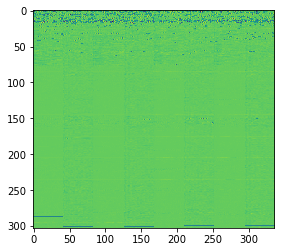

In [77]:
RESAMPLING_FACTOR = 4
contact_dict = data[4]

print(contact_dict["id"])
station = contact_dict["station_name"]
satellite = contact_dict["satellite_info"]["name"]
soft_start = contact_dict["start_unix"]
soft_end = contact_dict["end_unix"]
img_part, has_sync, dates, timestamps = _preprocess_contact_dict(
    contact_dict,
    soft_start,
    soft_end,
)

print(img_part.shape)
#doi = combine_lines(get_doi(img_part, has_sync), RESAMPLING_FACTOR, max_nan=8)
doi = combine_lines(_get_doi(img_part), RESAMPLING_FACTOR, max_nan=8)
plt.imshow(doi)
print(sum(contact_dict["has_sync"]))

406


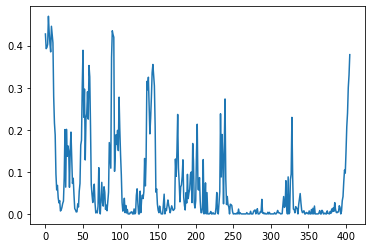

In [63]:
line_bers = [
    _estimate_apt_space_pixel_ber(line)
    for line in doi
]

print(len(line_bers))
plt.plot(line_bers)

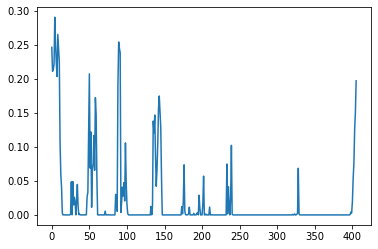

In [65]:
LINK_PARAMETERS = {
    # Widespread RS(255, 223) code as used by Voyager probes
    "255rs223": (223 / 255, 255, 16),
    # https://public.ccsds.org/Pubs/231x1o1.pdf
    # see also: http://pretty-good-codes.org/ldpc.html
    # NOTE that we assume the correctable bits == the minimum distance
    "ccsds256ldpc128": (128 / 256, 256, 24),
    "ccsds128ldpc64": (64 / 128, 128, 14),
    "nofail": (1, 1, 1),
    "none": (1, 1, 0),
}

def _ber_after_coding(ber_before_coding, uncoded_bit_rate,
                      fec_block_size, fec_correctable_bits):
    p_successful_block_transfer = 0
    # add up the probabilities for successful decoding
    for i in range(fec_correctable_bits + 1):
        p_successful_block_transfer += (
            # `block size - i` bits are correct
            (1 - ber_before_coding) ** (fec_block_size - i) *
            # i bits are wrong
            ber_before_coding ** i *
            # count of combinations possible with i wrong bits
            # as we can correct arbitrary combinations
            scipy.special.comb(fec_block_size, i)
        )
    # Get a BER back
    return 1 - (p_successful_block_transfer ** (1 / fec_block_size))

CODE = "ccsds256ldpc128"

plt.plot([_ber_after_coding(ber, *list(LINK_PARAMETERS[CODE])) for ber in line_bers])

453


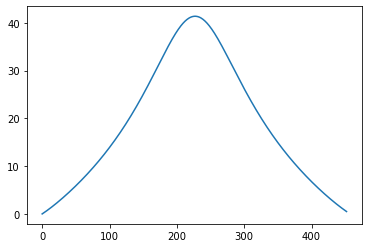

In [159]:
import math
import ephem
import datetime
import numpy as np

def _get_sat_altaz(sat_name, tle_array,
                       station_lat, station_lon, station_alt_m,
                       unixtime):
    gsobj = ephem.Observer()
    gsobj.lat = str(station_lat)
    gsobj.lon = str(station_lon)
    gsobj.date = datetime.datetime.utcfromtimestamp(unixtime)
    satobj = ephem.readtle(sat_name, *tle_array)
    satobj.compute(gsobj)
    return satobj.alt, satobj.az

def _get_resampled_altaz(contact_dict, timestamps, resampling_factor):
    altaz = [
        _get_sat_altaz(
            contact_dict["satellite_info"]["name"],
            contact_dict["tle"],
            contact_dict["station_lat"],
            contact_dict["station_lng"],
            contact_dict["station_alt"],
            ts,
        ) for ts in timestamps
    ]
    elevs = [elev * 180 / math.pi for elev, az in altaz]
    azs = [az * 180 / math.pi for elev, az in altaz]
    resampled_elevs = np.interp(
        np.arange(0, len(elevs) // resampling_factor * resampling_factor, resampling_factor),
        np.arange(0, len(elevs)),
        elevs,
    )
    resampled_azs = np.interp(
        np.arange(0, len(azs) // resampling_factor * resampling_factor, resampling_factor),
        np.arange(0, len(azs)),
        azs,
    )
    return resampled_elevs, resampled_azs

resampled_elevs = _get_resampled_altaz(contact_dict, timestamps, RESAMPLING_FACTOR)[0]
print(len(resampled_elevs))
plt.plot(resampled_elevs)

453


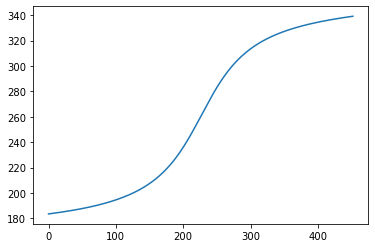

In [160]:
resampled_azs = _get_resampled_altaz(contact_dict, timestamps, RESAMPLING_FACTOR)[1]
print(len(resampled_azs))
plt.plot(resampled_azs)

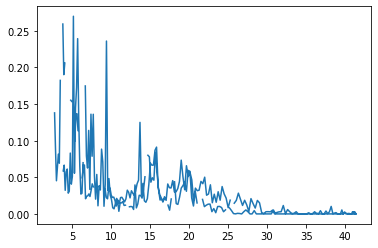

In [161]:
plt.plot(resampled_elevs, line_bers)

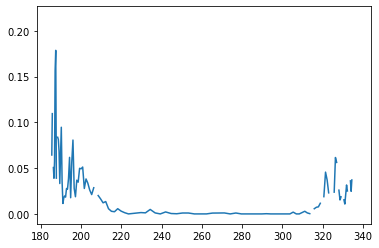

In [140]:
plt.plot(resampled_azs, line_bers)

In [309]:
from scipy.stats import gaussian_kde

def get_for_c(contact_dict, resampling_factor, max_nan=0):
    soft_start = contact_dict["start_unix"]
    soft_end = contact_dict["end_unix"]
    img_part, has_sync, dates, timestamps = _preprocess_contact_dict(
        contact_dict,
        soft_start,
        soft_end,
    )
    doi = combine_lines(
        get_doi(img_part, has_sync),
        resampling_factor,
        max_nan,
    )
    line_bers = [
        _estimate_apt_space_pixel_ber(line)
        for line in doi
    ]
    resampled_elevs, resampled_azs = _get_resampled_altaz(
        contact_dict,
        timestamps,
        resampling_factor,
    )
    return resampled_elevs, resampled_azs, line_bers

elevs = []
azs = []
bers = []
for d in data_by_satellite["NOAA 15"]["Saclay1"]:
    resampled_elevs, resampled_azs, line_bers = get_for_c(d, 10, 5)
    for i, ber in enumerate(line_bers):
        if np.isnan(ber):
            continue
        elevs.append(resampled_elevs[i])
        azs.append(resampled_azs[i])
        bers.append(ber)
        
print(len(elevs))

2348


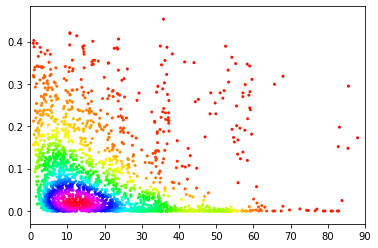

In [310]:
xy = np.vstack([elevs,bers])
z = gaussian_kde(xy)(xy)

plt.xlim(0, 90)
#plt.yscale("log")
#plt.ylim(1e-10, .5)
plt.scatter(elevs, bers, c=z, cmap="hsv", marker=".", edgecolor='')

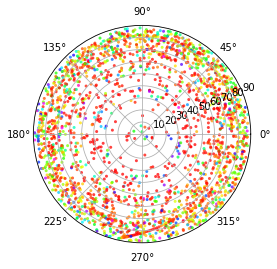

In [311]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.set_rlim(0, 90)
theta = azs
# note: elev is inverted!
r = [90 - e for e in elevs]
c = ax.scatter(theta, r, c=bers, cmap='hsv', alpha=0.75, marker=".", edgecolor='')

In [351]:
# TODO: cross-correlate contacts based on elevation-dependent error rate - should not work well b/c variations



# TODO: evaluate mean square error for predictions


# we need to derive one or more single values - function arguments or a threshold
# is a minimum elevation discovery sufficient?

# a + b/sin(elev)*e^(-c*elev) = loss, added noise may be part of a and b (atmos loss: e^-a*elev, path loss: b * distance = b*h/sin(elev))
# ber for bfsk: 1/2erfc(sqrt(eb/2n0)) (https://www.atlantarf.com/FSK_Modulation.php)
# TODO: curve fitting -> derive time series of parameters -> predict next -> check MSE / MSRE

import math
import scipy.special

def func(elev, base_snr, sat_height, atmos_factor):
    #return base_snr + sat_height / np.sin(elev / math.pi * 180)# * np.exp(-atmos_factor*elev)
    return 1/2*scipy.special.erfc(np.sqrt(sat_height / np.sin(elev / 180 * math.pi) * np.exp(-atmos_factor * elev)))

from scipy.optimize import curve_fit

res = []
for d in data_by_satellite["NOAA 19"]["Saclay1"]:
    resampled_elevs, resampled_azs, line_bers = get_for_c(d, 5, 3)
    e = []
    b = []
    for i, ber in enumerate(line_bers):
        if np.isnan(ber):
            continue
        e.append(resampled_elevs[i])
        b.append(ber)
    if not b:
        res.append(None)
        print("ne")
        continue
    try:
        res.append(curve_fit(func, np.array(e), np.array(b))[0])
        print(res[-1])
    except RuntimeError:
        res.append(None)
        print("nf")

# ... prediction of "usable" contact capacity (from minelev)

# events influencing capacity: equipment, antenna pointing, trajectory (elevation)
# how can this vary over time and not be statically configurable???

# concurrent contacts are more important (are they?) channel sharing whatever


ne


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


[1. 1. 1.]


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


[ 1.          0.01474618 -0.26549823]
[ 1.          0.01682229 -0.27417643]
[ 1.          0.04906832 -0.15807662]
ne
[ 1.00000000e+00  1.79769735e+06 -4.93352556e+04]
[ 1.          0.03000448 -0.18439852]
[ 1.          0.03094264 -0.20980606]
[ 1.          0.02464948 -0.2955929 ]
ne
[1. 1. 1.]
ne
ne
[1. 1. 1.]
[ 1.          0.0144842  -0.27004791]
[ 1.          0.07207628 -0.12989338]
ne
[1. 1. 1.]
[ 1.00000000e+00  1.93777815e-04 -2.84720067e-01]
[ 1.          0.02399722 -0.20573113]
[ 1.          0.07668491 -0.12581831]
[ 1.0000000e+00  1.0000000e+00 -9.8431113e+06]
ne
[ 1.          0.05555541 -0.10472527]
[ 1.          0.05902851 -0.13083923]
ne
[ 1.          0.07835596 -0.09058066]
[ 1.          0.03032638 -0.19537808]
ne
nf


TypeError: Improper input: N=3 must not exceed M=1

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


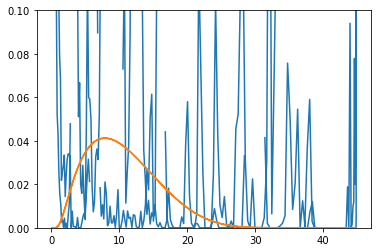

In [363]:

for i, d in enumerate(data_by_satellite["NOAA 19"]["Saclay1"]):
    if i != 21:
        continue
    e = res[i]
    resampled_elevs, resampled_azs, line_bers = get_for_c(d, 5,3)
    bers_calc = [func(elev, e[0], e[1], e[2]) for elev in resampled_elevs]
    plt.plot(resampled_elevs, line_bers)
    plt.plot(resampled_elevs, bers_calc)
    plt.ylim(0, .1)
    break

1608 of 1848


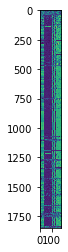

In [336]:
d = data_by_satellite["NOAA 19"]["Saclay1"][16]
print(sum(d["has_sync"]), "of", len(d["has_sync"]))
plt.imshow(d["linedata"])

1549007067 1549007989 922


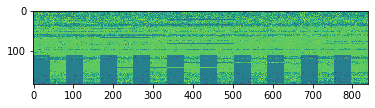

In [23]:
contact_dict = data_by_satellite["NOAA 15"]["Saclay1"][1]
resampling_factor = 10
max_nan = 7

soft_start = contact_dict["start_unix"]
soft_end = contact_dict["end_unix"]
print(soft_start, soft_end, soft_end - soft_start)
img_part, has_sync, dates, timestamps = _preprocess_contact_dict(
    contact_dict,
    soft_start,
    soft_end,
)
doi = combine_lines(
    get_doi(img_part, has_sync),
    resampling_factor,
    max_nan,
)

plt.imshow(doi)

Text(0, 0.5, 'estimated P(bit_error)')

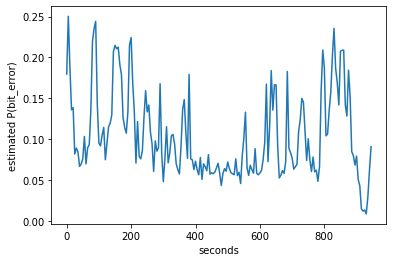

In [19]:

line_bers = [
    _estimate_apt_space_pixel_ber(line)
     for line in doi
]
plt.plot([i * 5 for i in range(len(line_bers))], line_bers)
plt.xlabel("seconds")
plt.ylabel("estimated P(bit_error)")

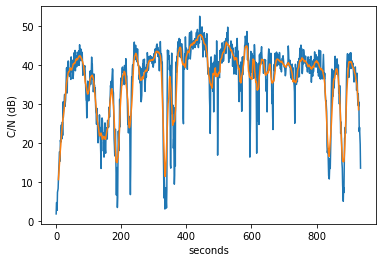

In [394]:
plt.plot(d["measured_snrs"])
plt.plot(([float("nan")] * 7) + list(moving_average(d["measured_snrs"], 14)))
plt.xlabel("seconds")
plt.ylabel("C/N (dB)")

In [ ]:
# TODO: find an approach to predict the contact probability
# in general: prediction of node reliability 
# (i.e. probability that node will be available - node reliability ??)
# XXX: depends on how this prob. is determined (by what it is dominated / induced)

# XXX use case for reliability prediction is questionable
# - typically user equipment is source or sink, not relevant for reliability of network
# - we need more like a fault detection which Juan is analyzing
# - distribution only makes sense for probability